<a href="https://colab.research.google.com/github/Location-Artistry/ColabNotebooks/blob/master/NHBP_Data_Explorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ArcREST Data Explorer**   
# Efficient ArcGIS Server Browsing Library
## Quickly view all services and layers available from an ArcGIS Server URL


### Built on top of bmi-arcgis-restapi library
bmi-arcgis-restapi provides additional functionality beyond the arcgis Python API.  It will use ArcPy if available, or open source libraries if not.
https://github.com/Bolton-and-Menk-GIS/restapi   
Also deploys GeoPandas to read in Layer Query as a GeoDataframe


## Class and Function Definitions
Creates 3 new classes:


1.   mapServer - the root ArcServer Object
2.   arcService - Services contained with the mapServer
3.   mapLayer - Layers available through a arcService




## Working to debug ArcREST Data Explorer Library to be compatible with NHBP ArcGIS Online Server Types
Working 1-15-2020


In [ ]:
!pip install bmi-arcgis-restapi
import restapi

In [16]:
# Class creates a <-mapServer object-> based on restapi.ArcServer from bmi-arcgis-restapi library
class mapServer:
# -init- function, ArcServer object as self.ags, server endpoint as self.url
  def __init__(self, url):
    try:
      creds = input(f'Credentials Needed (YES/NO)? ')
      if creds.upper() == 'YES':          
        id = input(f'ArcGIS Online USER ID: ')
        pwd = getpass.getpass('PASSWORD: ')
        self.ags = restapi.ArcServer(url, id, pwd)
      else:
        self.ags = restapi.ArcServer(url)
      self.url = url
      display('MAPSERVER OBJECT CREATED', self.ags)
    except:
      display(f'FAILED TO CREATE MAPSERVER')
# -getServices- displays and returns a list of all ArcGIS services
  def getServices(self):
    for i, service in enumerate(self.ags.services):
      display(f'{i} - Service Name: {service.name} -  Service Type: {service.type}')
    return self.ags.services 
# -getFolders- displays and returns list of all folders
  def getFolders(self):
    try:
      for i, folder in enumerate(self.ags.folders):
        display(f'{i} - Folder: {folder}') 
      return self.ags.folders
    except:
      return 0
# -getNestedServ- gets a mapServer's nested services
  def getNestedServices(self):
    for i, folder in enumerate(self.ags.folders):
      display(f'{i} - Folder: {folder}')
      ags = restapi.ArcServer(f'{self.ags.url}/{folder}')
      for z, service in enumerate(ags.services):
        display(f'   {z} - Service Name: {service.name} -  Service Type: {service.type}')
# -getAttr- get atrributes and show values for non-function methods of for MapServer Object
  def getAttr(self):
    for attribute in dir(self.ags):
      display(f'Attribute Names: {attribute} - {self.ags[attribute]}')
# -listAttr- list all attrbutes of MapServer Object
  def listAttr(self):
    return dir(self.ags)
# -getSubService- returns a arcService object within specified mapServer
  def getSubService(self, rootServer=0):
    folders = self.getFolders()
    services = self.getServices()
    display(f'{self.url} -  ')
    if not folders:
      fID = int(input(f'Select index of subservice: '))
      url = services[fID].name
      try:
        subService = self.getService(url)
        return subService
      except:
        url = (f'{self.url}/{url}/FeatureServer')
        # working here
        subService = arcService(self, url)
        return subService
    else:
      fID = int(input(f'Select index of subservice folder: '))
      serviceURL = (f'{self.url}/{folders[fID]}')
      subFolder = mapServer(serviceURL)
      subServices = subFolder.getServices()
      fID = int(input(f'Select index of subservice: '))
      serviceName = subServices[fID].name
      display(self.url, serviceName)
      subService = arcService(self, serviceName)
      return subService

# Class creates a <-arcService object-> based on ags.getService from bmi-arcgis-restapi library
class arcService:
# -init- create arcService from mapServer Class  
  def __init__(self, server, servName): 
    try:
      self.ags = server.ags.getService(servName)
      self.url = self.ags.url
      display(f'ARCSERVICE OBJECT CREATED - {self.ags.url}')  
    except:
      self.ags = restapi.MapService(servName)
      self.url = self.ags.url
      display(f'ARCSERVICE OBJECT CREATED - {self.ags.url}') 
  def getAttr(self):
    try:
      for attribute in dir(self.ags):
        display(f'Attribute Names: {attribute} - {self.ags[attribute]}')
    except:
      display(f'Could not get Attributes for: {self.ags.url}')
  def listAttr(self):
    try:
      return dir(self.ags)
    except:
      display(f'Could not get List Attributes for: {self.ags.url}')
  def desc(self):
    try:
      return self.ags.description
    except:
      display(f'Could not get Description for: {self.ags.url}')
  def spatialRef(self):
    try:
      return self.ags.spatialReference
    except:
      display(f'Could not get spatialReference for: {self.ags.url}')
  def units(self):
    try:
      return self.ags.units
    except:
      display(f'Could not get Units for: {self.ags.url}')
  def layers(self):
    try:
      return self.ags.list_layers()
    except:
      display(f'Could not list Layers for: {self.ags.url}')
  def tables(self):
    try:
      return self.ags.list_tables()
    except:
      display(f'Could not get Tables for: {self.ags.url}')
# -getLayer- returns a mapLayer from arcService Class
  def getLayer(self):
    try: 
      for i, lay in enumerate(self.ags.layers):
        display(f'{i} - {lay.name}')
      layers = self.layers()
      # small change here separate two lines of code for input ***
      time.sleep(1)
      fID = int(input('Select index of Layer: '))
      layerObj = mapLayer(self, layers[fID])
      return layerObj
    except:
      display(f'Could not Get Layers for: {self.ags.url}')
# -getTable- returns table object from arcService Class  
  def getTable(self):
    try:
      tableList = self.tables()
      for i, lay in enumerate(tableList):
        display(f'{i} - {tableList[i]}')
      time.sleep(1)
      fID = int(input(f'Select index of Table: '))      
      #table = self.ags.table(tableList[fID])
      tableID = tableList[fID]
      table = mapTable(self, tableID)
      return table
    except:
      display(f'Not able to return table for: {self.ags.url}')

# Class creates a <-Layer object-> based on ags.layer from bmi-arcgis-restapi library
class mapLayer:
  def __init__(self, service, lyrName): 
    try:
      self.lyr = service.ags.layer(lyrName)
      display(f'LAYER CREATED - {self.lyr.name} - id: {self.lyr.id} - url: {self.lyr.url}')
    except:
      display(f'COULD NOT CREATE mapLayer')
  def getInfo(self):
    try:
      display(f'{self.lyr.name} - capabilities: {self.lyr.capabilities} - query formats: {self.lyr.supportedQueryFormats} - count: {self.lyr.getCount()}')
    except:
      display(f'Could not get Info for: {self.lyr.name}')
  def getFields(self):
    try:
      return self.lyr.list_fields()
    except:
      display(f'Could not get Fields for: {self.lyr.name}')
  def getSubLayers(self):
    try:
      return self.lyr.subLayers
    except:
      display(f'{self.lyr.name} does not have any SubLayers')
# -layerQuery- prompts user for SQL query and fields, returns geoDataframe object which has access to all pandas/geoPandas methods
  def layerQuery (self):
    try:
      baseURL = self.lyr.url
      SQL = input(f'SQL query(ENTER for ALL): ') or '1=1'
      fields = input(f'Fields(ENTER for ALL)? ') or '*'
      RESTurl = (f'{baseURL}/query?f=geojson&where={SQL}&outFields={fields}')
      gdf = gpd.read_file(RESTurl)
      return gdf
    except:
      display(f'Query unsuccessful for: {self.lyr.name}')

# NEW CLASS NEED TO EDIT FIRST TO USE - MODELLED AFTER gisLayer
# Class creates a <-mapTable object-> based on ags.layer from bmi-arcgis-restapi library
class mapTable:
  def __init__(self, service, id): 
    try:
      self.table = service.ags.table(id)
      #self.lyr = service.ags.layer(lyrName)
      display(f'TABLE CREATED - {self.table.name} - id: {self.table.id} - url: {self.table.url}')
    except:
      display(f'COULD NOT CREATE mapTable')
  def getInfo(self):
    try:
      display(f'{self.table.name} - capabilities: {self.table.capabilities} - query formats: {self.table.supportedQueryFormats} - count: {self.table.getCount()}')
    except:
      display(f'Could not get Info for: {self.table.name}')
  def getFields(self):
    try:
      return self.table.list_fields()
    except:
      display(f'Could not get Fields for: {self.table.name}')
  def getSubLayers(self):
    try:
      return self.table.subLayers
    except:
      display(f'{self.table.name} does not have any SubTables')
# -layerQuery- prompts user for SQL query and fields, returns geoDataframe object which has access to all pandas/geoPandas methods
  def layerQuery (self):
    try:
      baseURL = self.table.url
      SQL = input(f'SQL query(ENTER for ALL): ') or '1=1'
      fields = input(f'Fields(ENTER for ALL)? ') or '*'
      RESTurl = (f'{baseURL}/query?f=geojson&where={SQL}&outFields={fields}')
      gdf = gpd.read_file(RESTurl)
      return gdf
    except:
      display(f'Query unsuccessful for: {self.table.name}')

## Sample Workflow from ArcGIS REST Server Endpoint
Entire Workflow for newly created Arc Server Workflow using bmi-arcgis-restapi


1.   Create mapServer with Server root url
2.   Derive specified arcService from root MapServer Object
3.   Generate layer from specified arcService Endpoint
4.   Return geoDataframe from layer query
5.   Perform data analysis and visualization with gdf



### Sample EPA Server Workflow

In [8]:
# 1 - Create MapServer with Server root url
rest_url = 'https://gispub.epa.gov/arcgis/rest/services'
gisServer = mapServer(rest_url)

Credentials Needed (YES/NO)? no


'MAPSERVER OBJECT CREATED'

<ArcServer: "gispub.epa.gov" ("arcgis")>

In [ ]:
# 2 - Derive specified arcService from root MapServer Object
gisService = gisServer.getSubService()

In [ ]:
# 3 - Generate layer from specific specified arcService Endpoint
gisLayer = gisService.getLayer()
gisLayer.getInfo()

'0 - ATTAINS Assessment Points'

'1 - ATTAINS Assessment Lines'

'2 - ATTAINS Assessment Areas'

'3 - ATTAINS Assessment Unit Catchment Associations'

Select index of Layer: 0


'LAYER CREATED - ATTAINS Assessment Points - id: 0 - url: https://gispub.epa.gov/arcgis/rest/services/OW/ATTAINS_Assessment/MapServer/0'

'ATTAINS Assessment Points - capabilities: Map,Query,Data - query formats: JSON, geoJSON, PBF - count: 4022'

In [ ]:
# 4 - Return geoDataframe from layer query
gdf = gisLayer.layerQuery()
gdf.head()

## Working NHBP Workflow
Functions to get layers and tables still randomly hanging

In [17]:
# 1 - Create MapServer with Server root url
rest_url = 'https://services5.arcgis.com/RsKCQCx9eUKixVOM/arcgis/rest/services'
gisServer = mapServer(rest_url)

Credentials Needed (YES/NO)? no


'MAPSERVER OBJECT CREATED'

<ArcServer: "services5.arcgis.com" ("RsKCQCx9eUKixVOM")>

In [ ]:
# 2 - Derive specified arcService from root MapServer Object
gisService = gisServer.getSubService()

In [19]:
gisService.layers()

['WATER_STATIONS_2020']

In [20]:
# 3 - Generate layer from specific specified arcService Endpoint
gisLayer = gisService.getLayer()
#gisLayer.getInfo()

'0 - WATER_STATIONS_2020'

Select index of Layer: 0


'LAYER CREATED - WATER_STATIONS_2020 - id: 0 - url: https://services5.arcgis.com/RsKCQCx9eUKixVOM/arcgis/rest/services/WATER_SAMPLING_2020/FeatureServer/0'

In [21]:
# 3(t) - new function to get table from Service
gisTable = gisService.getTable()
#gisTable.capabilities()

'0 - WATER_DATA_2020'

Select index of Table: 0


'TABLE CREATED - WATER_DATA_2020 - id: 1 - url: https://services5.arcgis.com/RsKCQCx9eUKixVOM/arcgis/rest/services/WATER_SAMPLING_2020/FeatureServer/1'

In [ ]:
# 4(t) - new function to get table from Service
gdf = gisTable.layerQuery()
gdf.head().T

In [ ]:
gisTable.getCount()

40

In [ ]:
# 4 - Return geoDataframe from layer query
gdf = gisLayer.layerQuery()
gdf.head()

In [ ]:
 gdf.info()

In [ ]:
columns = gdf.columns
columnName = columns[1]

In [ ]:
# List of unique organization IDs
uniqueVal = gdf[columnName].unique()
display(f'Number of {columnName}(s): {len(uniqueVal)}')
display(uniqueVal)

'Number of NAME(s): 2'

array(['1821 Reservation', '1827 Reservation'], dtype=object)

In [ ]:
valColumn = columns[1]
gdf[valColumn].value_counts()

1827 Reservation    1
1821 Reservation    1
Name: NAME, dtype: int64

In [ ]:
gdf.columns

Index(['OBJECTID', 'NAME', 'YEAR', 'COMMENT', 'Shape__Area', 'Shape__Length',
       'geometry'],
      dtype='object')

In [ ]:
gdf.groupby('Metals').count()

,OBJECTID,SiteName,MonitorType,AqsId,StationAddress,MonitoringDataWebpage,GeneralInfoWebsite,MonitorPhoto,CarbonMonoxide,TraceCarbon,NitrogenDixoide,NitrogenOxide,Ozone,SpeciationPartMat25micorn,ParticulateMatter25micron,ParticulateMatter10micron,BlackCarbon,SulfurDioxide,TraceSulfur,VolatileOrganicChemicals,Polycyclic,Carbonyls,Meteorilogic,geometry
Metals,,,,,,,,,,,,,,,,,,,,,,,,
No,33,33,33,32,33,32,33,30,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
Yes,12,12,12,12,12,12,12,9,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


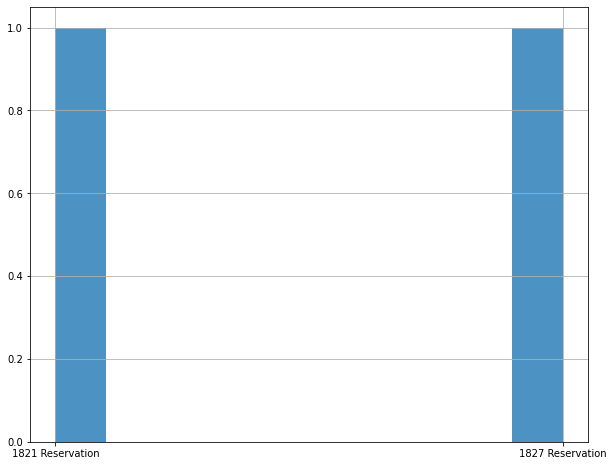

In [ ]:
gdf[columnName].hist(alpha=0.8, figsize=(10,8))

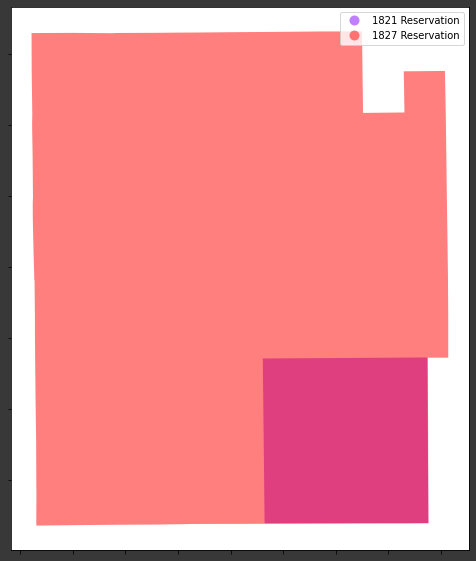

In [ ]:
fig, ax = plt.subplots(figsize=(15,10), facecolor='#383838')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf.plot(ax=ax, alpha=.5, markersize=40, column = columnName, legend='true', cmap='rainbow')

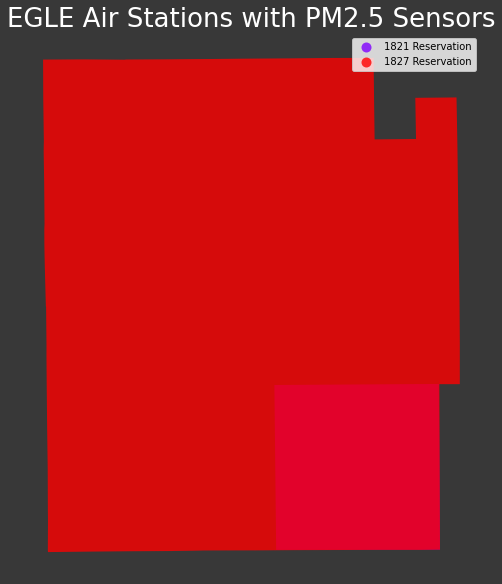

In [ ]:
fig, ax = plt.subplots(figsize=(15,10),facecolor='#383838')
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
#gdf2.plot(ax=ax, alpha=.3, color='none', linewidth=1, zorder=1, edgecolor='darkturquoise')
gdf.plot(ax=ax, alpha=.8, markersize=50, column = columnName, legend='true', cmap='rainbow')
plt.title('EGLE Air Stations with PM2.5 Sensors', fontsize=26, color='white')
ax.set_axis_off()
plt.show()

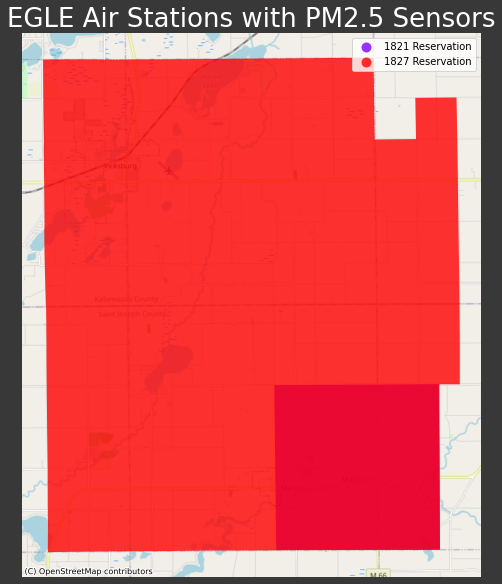

In [ ]:
gdf = gdf.to_crs('EPSG:3857')
fig, ax = plt.subplots(figsize=(20,10),facecolor='#383838')
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([])
gdf.plot(ax=ax, alpha=.8, markersize=50, column = columnName, legend='true', cmap='rainbow')
plt.title('EGLE Air Stations with PM2.5 Sensors', fontsize=26, color='white')
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)


In [ ]:
 m = folium.Map(location= [44.5, -85], zoom_start = 7, tiles = 'Stamen Toner', prefer_canvas=True)
 folium.GeoJson(gdf).add_to(m)
 m

## APPENDICIES

In [1]:
import os
os.environ['RESTAPI_USE_ARCPY'] = 'FALSE'
os.environ['RESTAPI_VERIFY_CERT'] = 'FALSE'

!pip install bmi-arcgis-restapi
import restapi

     |████████████████████████████████| 491kB 4.1MB/s 
  Created wheel for bmi-arcgis-restapi: filename=bmi_arcgis_restapi-2.0.2-cp36-none-any.whl size=493706 sha256=cd242efdbe7127bbaf706d4e29a957c4be1c88e17a18a7d2bcbf48bde07dc114
  Stored in directory: /root/.cache/pip/wheels/66/61/9e/5b7142135cc89747a0e095bdecaa428ac14549d570bffbce5a
Successfully built bmi-arcgis-restapi
arcpy import error:  


/usr/local/lib/python3.6/dist-packages/restapi/common_types.py:35: UserWarning: No Arcpy found, some limitations in functionality may apply.
  warnings.warn('No Arcpy found, some limitations in functionality may apply.')


In [2]:
%%time 
#!apt update
#!apt upgrade
#!apt-get install -qq libgdal-dev libproj-dev
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
import geopandas as gpd
!pip install contextily
import contextily as ctx
!pip install pygeos
!pip install folium

import time
import getpass
from pathlib import Path
from shapely.geometry import Point
from IPython.display import display
from IPython.display import Markdown as md
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import folium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 16 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

In [3]:
# view all installed packages on Colab
!pip list -v

Package                       Version           Location                               Installer
----------------------------- ----------------- -------------------------------------- ---------
absl-py                       0.10.0            /usr/local/lib/python3.6/dist-packages pip      
affine                        2.3.0             /usr/local/lib/python3.6/dist-packages pip      
alabaster                     0.7.12            /usr/local/lib/python3.6/dist-packages pip      
albumentations                0.1.12            /usr/local/lib/python3.6/dist-packages pip      
altair                        4.1.0             /usr/local/lib/python3.6/dist-packages pip      
argon2-cffi                   20.1.0            /usr/local/lib/python3.6/dist-packages pip      
asgiref                       3.3.1             /usr/local/lib/python3.6/dist-packages pip      
astor                         0.8.1             /usr/local/lib/python3.6/dist-packages pip      
astropy                       